# CVNN Initialization Methods Comparison

This notebook provides comprehensive visualizations and comparisons of all initialization methods available in the CVNN library.

We'll examine:
- Distribution properties (mean, std, range)
- Complex plane visualizations
- Phase and magnitude distributions
- Performance comparison on simple learning tasks

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cvnn import initialisations
from cvnn import Dense, Sequential
from cvnn.activations import complex_sigmoid, complex_sigmoid_backward
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)  # For reproducible results

print("CVNN Initialization Methods Visualization")
print("=" * 50)

CVNN Initialization Methods Visualization


In [3]:
# Define all initialization methods to test
complex_init_methods = {
    'complex_zeros': initialisations.complex_zeros,
    'complex_ones': initialisations.complex_ones,
    'complex_normal': initialisations.complex_normal,
    'complex_glorot_uniform': initialisations.complex_glorot_uniform,
    'complex_he_normal': initialisations.complex_he_normal,
    'complex_uniform': initialisations.complex_uniform,
    'complex_lecun_normal': initialisations.complex_lecun_normal,
    'complex_lecun_uniform': initialisations.complex_lecun_uniform,
    'complex_rand_phase': initialisations.complex_rand_phase,
    'jamie': initialisations.jamie,
    'jamie_bias': initialisations.jamie_bias
}

real_init_methods = {
    'zeros': initialisations.zeros,
    'ones': initialisations.ones,
    'normal': initialisations.normal,
    'glorot_uniform': initialisations.glorot_uniform,
    'he_normal': initialisations.he_normal
}

# Test shape for visualizations
test_shape = (100, 50)  # 100 inputs, 50 outputs
n_samples = 1000  # Number of samples for distribution analysis

print(f"Testing with shape: {test_shape}")
print(f"Complex initialization methods: {len(complex_init_methods)}")
print(f"Real initialization methods: {len(real_init_methods)}")

Testing with shape: (100, 50)
Complex initialization methods: 11
Real initialization methods: 5



SECTION 1: COMPLEX PLANE VISUALIZATION


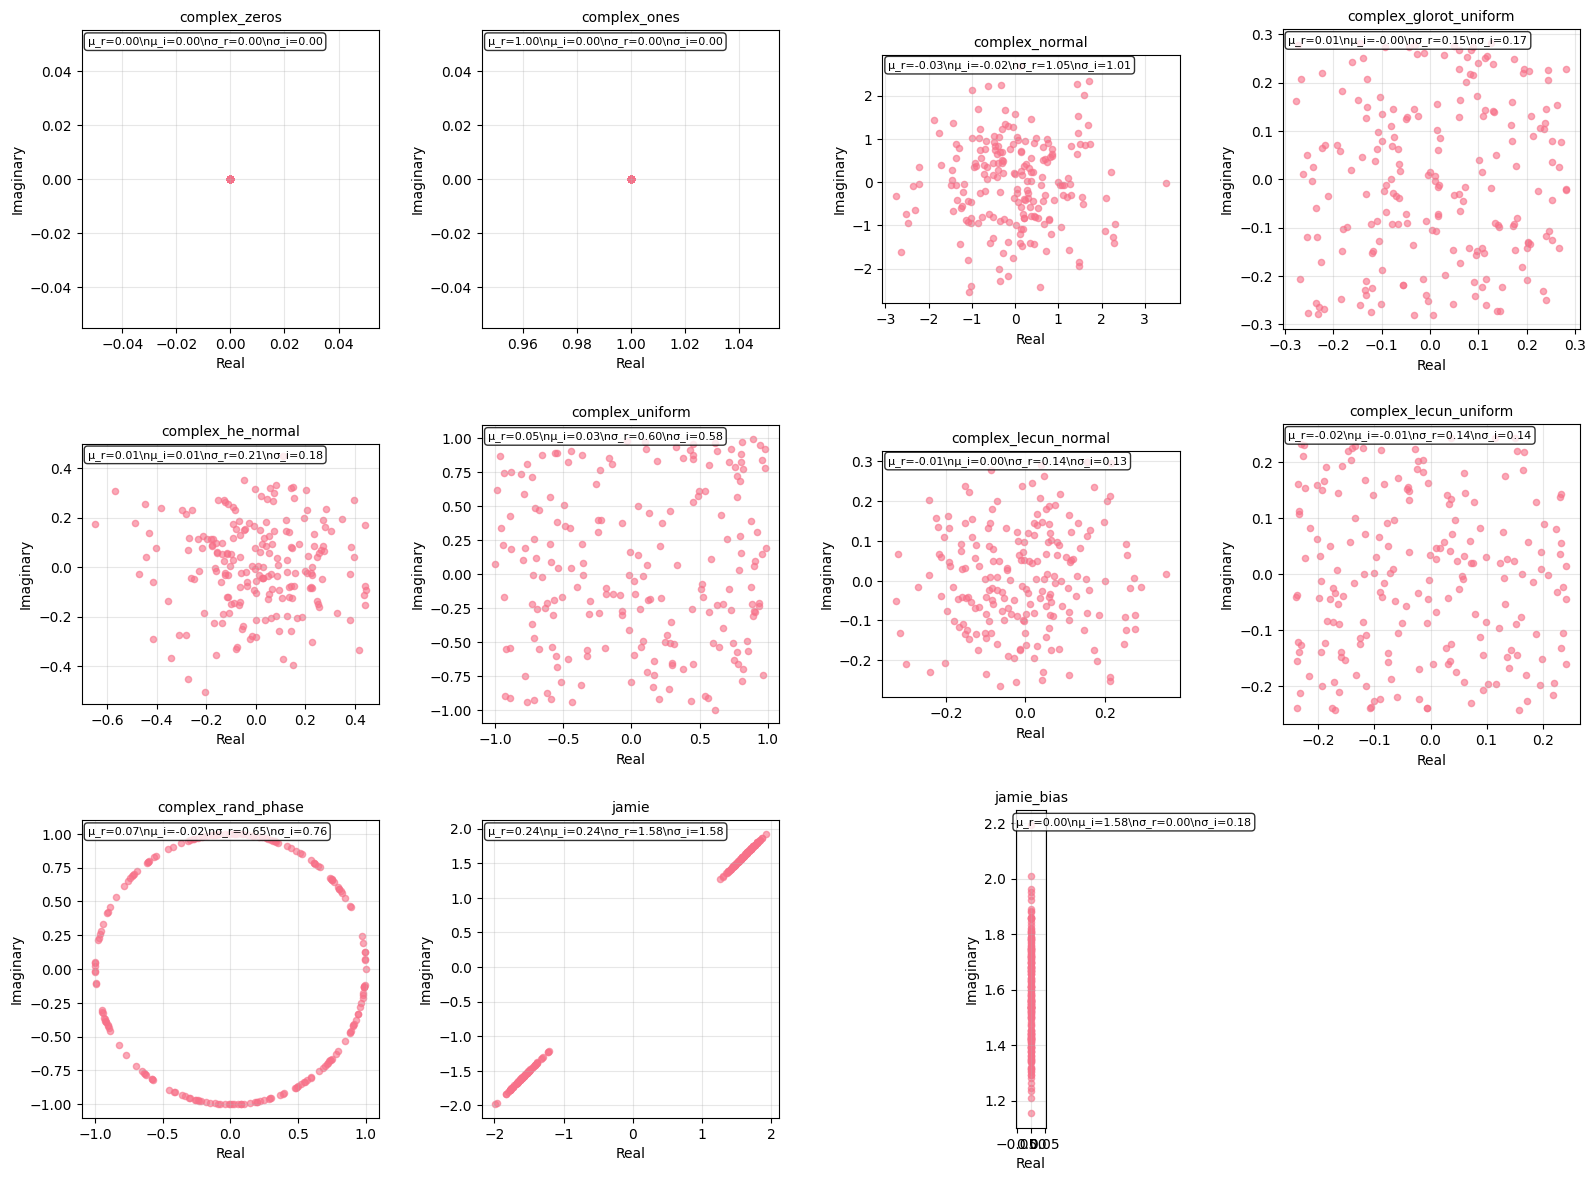

In [5]:
# Section 1: Complex Plane Visualization
print("\n" + "="*60)
print("SECTION 1: COMPLEX PLANE VISUALIZATION")
print("="*60)

# Create figure for complex plane plots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

# Sample a subset for visualization (too many points would be cluttered)
viz_shape = (50, 25)  # Smaller shape for visualization
n_viz_points = 200  # Number of points to plot

for i, (name, init_func) in enumerate(complex_init_methods.items()):
    if i >= len(axes):
        break
        
    # Generate weights
    try:
        weights = init_func(viz_shape)
        
        # Sample random points for visualization
        flat_weights = weights.flatten()
        if len(flat_weights) > n_viz_points:
            idx = np.random.choice(len(flat_weights), n_viz_points, replace=False)
            sample_weights = flat_weights[idx]
        else:
            sample_weights = flat_weights
        
        # Plot on complex plane
        ax = axes[i]
        ax.scatter(sample_weights.real, sample_weights.imag, alpha=0.6, s=20)
        ax.set_title(name, fontsize=10)
        ax.set_xlabel('Real')
        ax.set_ylabel('Imaginary')
        ax.grid(True, alpha=0.3)
        ax.set_aspect('equal')
        
        # Add statistics
        mean_real = np.mean(sample_weights.real)
        mean_imag = np.mean(sample_weights.imag)
        std_real = np.std(sample_weights.real)
        std_imag = np.std(sample_weights.imag)
        
        stats_text = f'μ_r={mean_real:.2f}\\nμ_i={mean_imag:.2f}\\nσ_r={std_real:.2f}\\nσ_i={std_imag:.2f}'
        ax.text(0.02, 0.98, stats_text, 
                transform=ax.transAxes, va='top', fontsize=8, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
    except Exception as e:
        ax = axes[i]
        ax.text(0.5, 0.5, f'Error:\\n{str(e)[:50]}', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(name + ' (Error)', fontsize=10)

# Remove unused subplots
for i in range(len(complex_init_methods), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
# Section 2: Phase and Magnitude Distribution Analysis
print("\\n" + "="*60)
print("SECTION 2: PHASE AND MAGNITUDE DISTRIBUTIONS")
print("="*60)

# Create figure for phase distributions
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for i, (name, init_func) in enumerate(complex_init_methods.items()):
    if i >= len(axes):
        break
        
    try:
        weights = init_func(test_shape)
        flat_weights = weights.flatten()
        
        # Calculate phases and magnitudes
        phases = np.angle(flat_weights)
        magnitudes = np.abs(flat_weights)
        
        # Plot phase distribution
        ax = axes[i]
        
        # Create phase histogram
        n_bins = 30
        counts, bins, patches = ax.hist(phases, bins=n_bins, alpha=0.7, density=True, color='skyblue', edgecolor='black')
        
        ax.set_title(f'{name}\\nPhase Distribution', fontsize=10)
        ax.set_xlabel('Phase (radians)')
        ax.set_ylabel('Density')
        ax.set_xlim(-np.pi, np.pi)
        ax.grid(True, alpha=0.3)
        
        # Add phase statistics
        phase_mean = np.mean(phases)
        phase_std = np.std(phases)
        mag_mean = np.mean(magnitudes)
        mag_std = np.std(magnitudes)
        
        stats_text = f'Phase: μ={phase_mean:.2f}, σ={phase_std:.2f}\\nMag: μ={mag_mean:.2f}, σ={mag_std:.2f}'
        ax.text(0.02, 0.98, stats_text, 
                transform=ax.transAxes, va='top', fontsize=8,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
    except Exception as e:
        ax = axes[i]
        ax.text(0.5, 0.5, f'Error:\\n{str(e)[:50]}', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(name + ' (Error)', fontsize=10)

# Remove unused subplots
for i in range(len(complex_init_methods), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()"